In [1]:
#GitHub Link:-https://github.com/arpit-shrivastava-2020/Deep-Learning-Lab-Assignment-6.git

In [2]:
print("Code By Arpit Shrivastava,Registration Number(20MAI0068)")

Code By Arpit Shrivastava,Registration Number(20MAI0068)


In [3]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 37s 10ms/step - loss: 0.3170 - val_loss: 0.1545
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1484 - val_loss: 0.1317
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1301 - val_loss: 0.1218
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1216 - val_loss: 0.1166
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1172 - val_loss: 0.1127
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1133 - val_loss: 0.1098
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1106 - val_loss: 0.1076
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1085 - val_loss: 0.1067
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1067 - val_loss: 0.1047
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - val_loss: 0.10

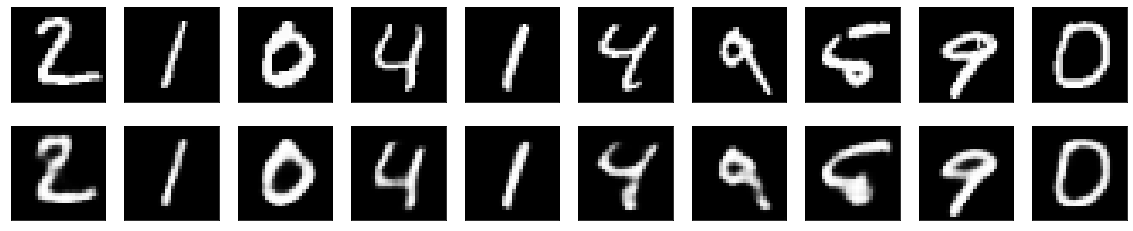

In [6]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

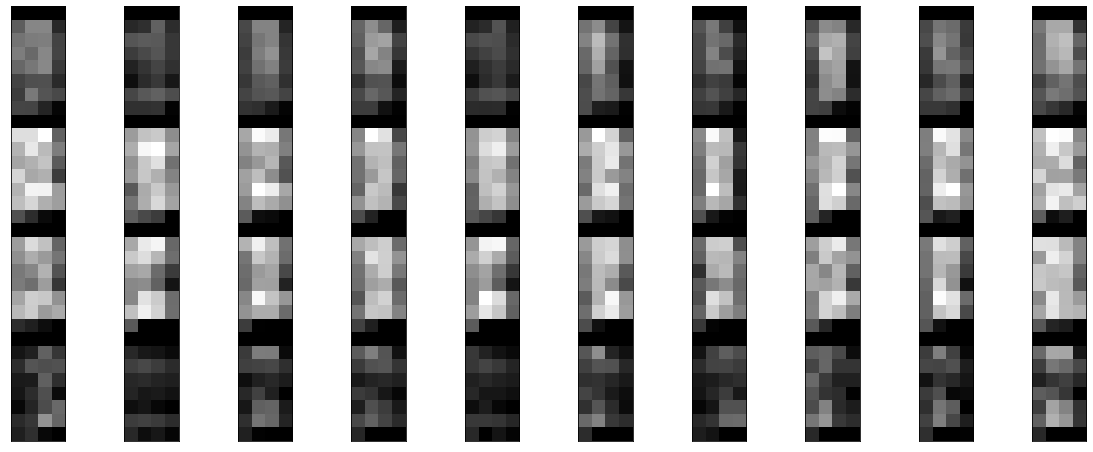

In [7]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
#Denoising Autoencoders

In [9]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch
import torch.optim as optim
from torch.autograd import Variable

In [10]:
def add_noise(img,noise_type="gaussian"):
  
  row,col=28,28
  img=img.astype(np.float32)
  
  if noise_type=="gaussian":
    mean=0
    var=10
    sigma=var**.5
    noise=np.random.normal(-5.9,5.9,img.shape)
    noise=noise.reshape(row,col)
    img=img+noise
    return img

  if noise_type=="speckle":
    noise=np.random.randn(row,col)
    noise=noise.reshape(row,col)
    img=img+img*noise
    return img

In [11]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print("No of training datapoints:{}\nNo of Test datapoints:{}".format(len(xtrain),len(xtest)))

No of training datapoints:60000
No of Test datapoints:10000


In [12]:
noises=["gaussian","speckle"]
noise_ct=0
noise_id=0
traindata=np.zeros((60000,28,28))



for idx in tqdm(range(len(xtrain))):
  
  if noise_ct<(len(xtrain)/2):
    noise_ct+=1
    traindata[idx]=add_noise(xtrain[idx],noise_type=noises[noise_id])
    
  else:
    print("\n{} noise addition completed to images".format(noises[noise_id]))
    noise_id+=1
    noise_ct=0


print("\n{} noise addition completed to images".format(noises[noise_id])) 




noise_ct=0
noise_id=0
testdata=np.zeros((10000,28,28))

for idx in tqdm(range(len(xtest))):
  
  if noise_ct<(len(xtest)/2):
    noise_ct+=1
    x=add_noise(xtest[idx],noise_type=noises[noise_id])
    testdata[idx]=x
    
  else:
    print("\n{} noise addition completed to images".format(noises[noise_id]))
    noise_id+=1
    noise_ct=0


print("\n{} noise addition completed to images".format(noises[noise_id]))

 54%|█████▍    | 32563/60000 [00:01<00:01, 20123.67it/s]


gaussian noise addition completed to images


 22%|██▏       | 2173/10000 [00:00<00:00, 21725.26it/s]


speckle noise addition completed to images


 85%|████████▍ | 8468/10000 [00:00<00:00, 21365.67it/s]


gaussian noise addition completed to images


100%|██████████| 10000/10000 [00:00<00:00, 21025.73it/s]


speckle noise addition completed to images


Text(0.5, 1.0, 'Noised Image')

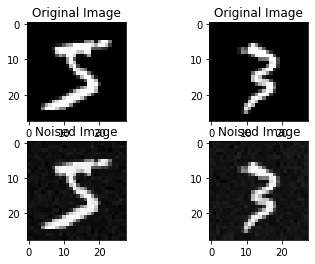

In [13]:
f, axes=plt.subplots(2,2)

axes[0,0].imshow(xtrain[0],cmap="gray")
axes[0,0].set_title("Original Image")
axes[1,0].imshow(traindata[0],cmap='gray')
axes[1,0].set_title("Noised Image")

axes[0,1].imshow(xtrain[25000],cmap='gray')
axes[0,1].set_title("Original Image")
axes[1,1].imshow(traindata[25000],cmap="gray")
axes[1,1].set_title("Noised Image")

In [14]:
class noisedDataset(Dataset):
  
  def __init__(self,datasetnoised,datasetclean,labels,transform):
    self.noise=datasetnoised
    self.clean=datasetclean
    self.labels=labels
    self.transform=transform
  
  def __len__(self):
    return len(self.noise)
  
  def __getitem__(self,idx):
    xNoise=self.noise[idx]
    xClean=self.clean[idx]
    y=self.labels[idx]
    
    if self.transform != None:
      xNoise=self.transform(xNoise)
      xClean=self.transform(xClean)
      
    
    return (xNoise,xClean,y)

In [15]:
tsfms=transforms.Compose([
    transforms.ToTensor()
])

trainset=noisedDataset(traindata,xtrain,ytrain,tsfms)
testset=noisedDataset(testdata,xtest,ytest,tsfms)

In [16]:
batch_size=32



trainloader=DataLoader(trainset,batch_size=32,shuffle=True)
testloader=DataLoader(testset,batch_size=1,shuffle=True)

In [17]:
class denoising_model(nn.Module):
  def __init__(self):
    super(denoising_model,self).__init__()
    self.encoder=nn.Sequential(
                  nn.Linear(28*28,256),
                  nn.ReLU(True),
                  nn.Linear(256,128),
                  nn.ReLU(True),
                  nn.Linear(128,64),
                  nn.ReLU(True)
        
                  )
    
    self.decoder=nn.Sequential(
                  nn.Linear(64,128),
                  nn.ReLU(True),
                  nn.Linear(128,256),
                  nn.ReLU(True),
                  nn.Linear(256,28*28),
                  nn.Sigmoid(),
                  )
    
 
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    
    return x

In [18]:
if torch.cuda.is_available()==True:
  device="cuda:0"
else:
  device ="cpu"

  
model=denoising_model().to(device)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,weight_decay=1e-5)


epochs=120
l=len(trainloader)
losslist=list()
epochloss=0
running_loss=0
for epoch in range(epochs):
  
  print("Entering Epoch: ",epoch)
  for dirty,clean,label in tqdm((trainloader)):
    
    
    dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor)
    clean=clean.view(clean.size(0),-1).type(torch.FloatTensor)
    dirty,clean=dirty.to(device),clean.to(device)
    
    
    
    output=model(dirty)
    loss=criterion(output,clean)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss+=loss.item()
    epochloss+=loss.item()
  losslist.append(running_loss/l)
  running_loss=0
  print("======> epoch: {}/{}, Loss:{}".format(epoch,epochs,loss.item()))


  0%|          | 0/1875 [00:00<?, ?it/s]

Entering Epoch:  0


  2%|▏         | 31/1875 [00:00<00:06, 304.99it/s]

======> epoch: 0/120, Loss:0.08253780752420425
Entering Epoch:  1


  2%|▏         | 30/1875 [00:00<00:06, 299.27it/s]

======> epoch: 1/120, Loss:0.07443509995937347
Entering Epoch:  2


  2%|▏         | 31/1875 [00:00<00:06, 305.34it/s]

======> epoch: 2/120, Loss:0.06544748693704605
Entering Epoch:  3


  2%|▏         | 32/1875 [00:00<00:05, 312.00it/s]

======> epoch: 3/120, Loss:0.0633927509188652
Entering Epoch:  4


  2%|▏         | 31/1875 [00:00<00:06, 303.34it/s]

======> epoch: 4/120, Loss:0.06174468994140625
Entering Epoch:  5


  2%|▏         | 31/1875 [00:00<00:06, 303.01it/s]

======> epoch: 5/120, Loss:0.050993651151657104
Entering Epoch:  6


  2%|▏         | 31/1875 [00:00<00:06, 306.22it/s]

======> epoch: 6/120, Loss:0.054039787501096725
Entering Epoch:  7


  2%|▏         | 31/1875 [00:00<00:06, 304.67it/s]

======> epoch: 7/120, Loss:0.04653427377343178
Entering Epoch:  8


  2%|▏         | 33/1875 [00:00<00:05, 323.82it/s]

======> epoch: 8/120, Loss:0.04845762997865677
Entering Epoch:  9


  2%|▏         | 30/1875 [00:00<00:06, 299.37it/s]

======> epoch: 9/120, Loss:0.042364515364170074
Entering Epoch:  10


  1%|▏         | 27/1875 [00:00<00:06, 268.12it/s]

======> epoch: 10/120, Loss:0.04409638047218323
Entering Epoch:  11


  2%|▏         | 30/1875 [00:00<00:06, 299.66it/s]

======> epoch: 11/120, Loss:0.0428958497941494
Entering Epoch:  12


  2%|▏         | 32/1875 [00:00<00:05, 311.01it/s]

======> epoch: 12/120, Loss:0.04227667301893234
Entering Epoch:  13


  2%|▏         | 32/1875 [00:00<00:05, 311.23it/s]

======> epoch: 13/120, Loss:0.037617702037096024
Entering Epoch:  14


  2%|▏         | 31/1875 [00:00<00:06, 305.85it/s]

======> epoch: 14/120, Loss:0.03625728189945221
Entering Epoch:  15


  2%|▏         | 30/1875 [00:00<00:06, 294.73it/s]

======> epoch: 15/120, Loss:0.04022964462637901
Entering Epoch:  16


  2%|▏         | 32/1875 [00:00<00:05, 317.06it/s]

======> epoch: 16/120, Loss:0.04111188277602196
Entering Epoch:  17


  2%|▏         | 29/1875 [00:00<00:06, 285.30it/s]

======> epoch: 17/120, Loss:0.03662844002246857
Entering Epoch:  18


  2%|▏         | 31/1875 [00:00<00:06, 306.46it/s]

======> epoch: 18/120, Loss:0.03210599347949028
Entering Epoch:  19


  2%|▏         | 31/1875 [00:00<00:06, 302.82it/s]

======> epoch: 19/120, Loss:0.04103580862283707
Entering Epoch:  20


  2%|▏         | 31/1875 [00:00<00:06, 301.95it/s]

======> epoch: 20/120, Loss:0.041138116270303726
Entering Epoch:  21


  2%|▏         | 31/1875 [00:00<00:06, 303.81it/s]

======> epoch: 21/120, Loss:0.03375332057476044
Entering Epoch:  22


  2%|▏         | 29/1875 [00:00<00:06, 289.36it/s]

======> epoch: 22/120, Loss:0.034878842532634735
Entering Epoch:  23


  2%|▏         | 30/1875 [00:00<00:06, 291.50it/s]

======> epoch: 23/120, Loss:0.03523800149559975
Entering Epoch:  24


  2%|▏         | 32/1875 [00:00<00:05, 311.90it/s]

======> epoch: 24/120, Loss:0.03488479182124138
Entering Epoch:  25


  2%|▏         | 32/1875 [00:00<00:05, 318.20it/s]

======> epoch: 25/120, Loss:0.0344792865216732
Entering Epoch:  26


  2%|▏         | 29/1875 [00:00<00:06, 287.06it/s]

======> epoch: 26/120, Loss:0.036844927817583084
Entering Epoch:  27


  2%|▏         | 30/1875 [00:00<00:06, 297.82it/s]

======> epoch: 27/120, Loss:0.03172576054930687
Entering Epoch:  28


  2%|▏         | 31/1875 [00:00<00:06, 302.86it/s]

======> epoch: 28/120, Loss:0.032047152519226074
Entering Epoch:  29


  2%|▏         | 32/1875 [00:00<00:05, 315.84it/s]

======> epoch: 29/120, Loss:0.033200230449438095
Entering Epoch:  30


  2%|▏         | 30/1875 [00:00<00:06, 297.32it/s]

======> epoch: 30/120, Loss:0.03090544044971466
Entering Epoch:  31


  2%|▏         | 31/1875 [00:00<00:05, 309.40it/s]

======> epoch: 31/120, Loss:0.03216371312737465
Entering Epoch:  32


  2%|▏         | 32/1875 [00:00<00:06, 306.91it/s]

======> epoch: 32/120, Loss:0.028437813743948936
Entering Epoch:  33


  2%|▏         | 29/1875 [00:00<00:06, 286.25it/s]

======> epoch: 33/120, Loss:0.03390279784798622
Entering Epoch:  34


  2%|▏         | 31/1875 [00:00<00:05, 308.12it/s]

======> epoch: 34/120, Loss:0.03095398284494877
Entering Epoch:  35


  2%|▏         | 31/1875 [00:00<00:05, 307.45it/s]

======> epoch: 35/120, Loss:0.032500188797712326
Entering Epoch:  36


  2%|▏         | 32/1875 [00:00<00:05, 313.08it/s]

======> epoch: 36/120, Loss:0.031720053404569626
Entering Epoch:  37


  2%|▏         | 30/1875 [00:00<00:06, 296.41it/s]

======> epoch: 37/120, Loss:0.02807881496846676
Entering Epoch:  38


  2%|▏         | 31/1875 [00:00<00:06, 306.25it/s]

======> epoch: 38/120, Loss:0.030735399574041367
Entering Epoch:  39


  2%|▏         | 32/1875 [00:00<00:05, 314.38it/s]

======> epoch: 39/120, Loss:0.029323995113372803
Entering Epoch:  40


  2%|▏         | 30/1875 [00:00<00:06, 297.79it/s]

======> epoch: 40/120, Loss:0.031229909509420395
Entering Epoch:  41


  2%|▏         | 32/1875 [00:00<00:05, 316.12it/s]

======> epoch: 41/120, Loss:0.0285455621778965
Entering Epoch:  42


  2%|▏         | 29/1875 [00:00<00:06, 289.42it/s]

======> epoch: 42/120, Loss:0.0323258712887764
Entering Epoch:  43


  2%|▏         | 31/1875 [00:00<00:05, 309.63it/s]

======> epoch: 43/120, Loss:0.027443116530776024
Entering Epoch:  44


  2%|▏         | 29/1875 [00:00<00:06, 282.75it/s]

======> epoch: 44/120, Loss:0.027841921895742416
Entering Epoch:  45


  2%|▏         | 31/1875 [00:00<00:06, 303.44it/s]

======> epoch: 45/120, Loss:0.029778877273201942
Entering Epoch:  46


  2%|▏         | 30/1875 [00:00<00:06, 293.43it/s]

======> epoch: 46/120, Loss:0.03175364062190056
Entering Epoch:  47


  2%|▏         | 32/1875 [00:00<00:05, 313.82it/s]

======> epoch: 47/120, Loss:0.025942916050553322
Entering Epoch:  48


  2%|▏         | 31/1875 [00:00<00:06, 301.25it/s]

======> epoch: 48/120, Loss:0.026476480066776276
Entering Epoch:  49


  2%|▏         | 30/1875 [00:00<00:06, 299.22it/s]

======> epoch: 49/120, Loss:0.029586946591734886
Entering Epoch:  50


  1%|▏         | 28/1875 [00:00<00:06, 279.73it/s]

======> epoch: 50/120, Loss:0.028683388605713844
Entering Epoch:  51


  2%|▏         | 31/1875 [00:00<00:06, 307.24it/s]

======> epoch: 51/120, Loss:0.026483802124857903
Entering Epoch:  52


  2%|▏         | 29/1875 [00:00<00:06, 286.38it/s]

======> epoch: 52/120, Loss:0.025295402854681015
Entering Epoch:  53


  2%|▏         | 29/1875 [00:00<00:06, 288.26it/s]

======> epoch: 53/120, Loss:0.02659483253955841
Entering Epoch:  54


  1%|▏         | 28/1875 [00:00<00:06, 271.78it/s]

======> epoch: 54/120, Loss:0.026981713250279427
Entering Epoch:  55


  2%|▏         | 30/1875 [00:00<00:06, 291.78it/s]

======> epoch: 55/120, Loss:0.026698390021920204
Entering Epoch:  56


  2%|▏         | 29/1875 [00:00<00:06, 283.99it/s]

======> epoch: 56/120, Loss:0.0220845565199852
Entering Epoch:  57


  2%|▏         | 32/1875 [00:00<00:05, 312.61it/s]

======> epoch: 57/120, Loss:0.02375177852809429
Entering Epoch:  58


  2%|▏         | 30/1875 [00:00<00:06, 298.63it/s]

======> epoch: 58/120, Loss:0.03163142129778862
Entering Epoch:  59


  2%|▏         | 32/1875 [00:00<00:05, 314.60it/s]

======> epoch: 59/120, Loss:0.029116332530975342
Entering Epoch:  60


  1%|▏         | 27/1875 [00:00<00:06, 266.40it/s]

======> epoch: 60/120, Loss:0.02458348497748375
Entering Epoch:  61


  2%|▏         | 31/1875 [00:00<00:06, 301.59it/s]

======> epoch: 61/120, Loss:0.023830052465200424
Entering Epoch:  62


  1%|▏         | 27/1875 [00:00<00:06, 268.15it/s]

======> epoch: 62/120, Loss:0.025891777127981186
Entering Epoch:  63


  2%|▏         | 30/1875 [00:00<00:06, 298.72it/s]

======> epoch: 63/120, Loss:0.02943028137087822
Entering Epoch:  64


  2%|▏         | 31/1875 [00:00<00:06, 302.51it/s]

======> epoch: 64/120, Loss:0.022723492234945297
Entering Epoch:  65


  2%|▏         | 29/1875 [00:00<00:06, 285.40it/s]

======> epoch: 65/120, Loss:0.028977850452065468
Entering Epoch:  66


  2%|▏         | 31/1875 [00:00<00:06, 307.03it/s]

======> epoch: 66/120, Loss:0.024652263149619102
Entering Epoch:  67


  1%|▏         | 25/1875 [00:00<00:07, 246.72it/s]

======> epoch: 67/120, Loss:0.02522115781903267
Entering Epoch:  68


  2%|▏         | 30/1875 [00:00<00:06, 293.16it/s]

======> epoch: 68/120, Loss:0.023879794403910637
Entering Epoch:  69


  2%|▏         | 31/1875 [00:00<00:05, 307.38it/s]

======> epoch: 69/120, Loss:0.026007575914263725
Entering Epoch:  70


  2%|▏         | 31/1875 [00:00<00:06, 307.21it/s]

======> epoch: 70/120, Loss:0.02524811401963234
Entering Epoch:  71


  2%|▏         | 29/1875 [00:00<00:06, 287.91it/s]

======> epoch: 71/120, Loss:0.02531583234667778
Entering Epoch:  72


  2%|▏         | 30/1875 [00:00<00:06, 292.83it/s]

======> epoch: 72/120, Loss:0.02647833339869976
Entering Epoch:  73


  2%|▏         | 31/1875 [00:00<00:06, 307.16it/s]

======> epoch: 73/120, Loss:0.026151660829782486
Entering Epoch:  74


  1%|▏         | 26/1875 [00:00<00:07, 259.54it/s]

======> epoch: 74/120, Loss:0.02220565639436245
Entering Epoch:  75


  1%|▏         | 28/1875 [00:00<00:06, 278.75it/s]

======> epoch: 75/120, Loss:0.02576724998652935
Entering Epoch:  76


  2%|▏         | 29/1875 [00:00<00:06, 280.55it/s]

======> epoch: 76/120, Loss:0.027739889919757843
Entering Epoch:  77


  2%|▏         | 30/1875 [00:00<00:06, 292.76it/s]

======> epoch: 77/120, Loss:0.0225584264844656
Entering Epoch:  78


  2%|▏         | 31/1875 [00:00<00:06, 303.42it/s]

======> epoch: 78/120, Loss:0.02301095426082611
Entering Epoch:  79


  2%|▏         | 30/1875 [00:00<00:06, 296.32it/s]

======> epoch: 79/120, Loss:0.027364173904061317
Entering Epoch:  80


  2%|▏         | 31/1875 [00:00<00:05, 308.50it/s]

======> epoch: 80/120, Loss:0.026919718831777573
Entering Epoch:  81


  2%|▏         | 29/1875 [00:00<00:06, 284.63it/s]

======> epoch: 81/120, Loss:0.022935453802347183
Entering Epoch:  82


  2%|▏         | 30/1875 [00:00<00:06, 291.48it/s]

======> epoch: 82/120, Loss:0.02374233491718769
Entering Epoch:  83


  2%|▏         | 30/1875 [00:00<00:06, 293.29it/s]

======> epoch: 83/120, Loss:0.02601674012839794
Entering Epoch:  84


  2%|▏         | 31/1875 [00:00<00:06, 305.06it/s]

======> epoch: 84/120, Loss:0.02545558288693428
Entering Epoch:  85


  2%|▏         | 29/1875 [00:00<00:06, 285.07it/s]

======> epoch: 85/120, Loss:0.02435336448252201
Entering Epoch:  86


  2%|▏         | 31/1875 [00:00<00:06, 307.19it/s]

======> epoch: 86/120, Loss:0.024665268138051033
Entering Epoch:  87


  2%|▏         | 31/1875 [00:00<00:06, 301.38it/s]

======> epoch: 87/120, Loss:0.024280594661831856
Entering Epoch:  88


  2%|▏         | 32/1875 [00:00<00:05, 312.62it/s]

======> epoch: 88/120, Loss:0.02217320166528225
Entering Epoch:  89


  1%|▏         | 28/1875 [00:00<00:06, 275.60it/s]

======> epoch: 89/120, Loss:0.02366725727915764
Entering Epoch:  90


  2%|▏         | 30/1875 [00:00<00:06, 299.00it/s]

======> epoch: 90/120, Loss:0.021197186782956123
Entering Epoch:  91


  2%|▏         | 31/1875 [00:00<00:05, 309.98it/s]

======> epoch: 91/120, Loss:0.023715058341622353
Entering Epoch:  92


  1%|▏         | 28/1875 [00:00<00:06, 273.10it/s]

======> epoch: 92/120, Loss:0.02373599261045456
Entering Epoch:  93


  1%|▏         | 28/1875 [00:00<00:06, 277.92it/s]

======> epoch: 93/120, Loss:0.024306412786245346
Entering Epoch:  94


  1%|▏         | 24/1875 [00:00<00:07, 234.28it/s]

======> epoch: 94/120, Loss:0.03183601796627045
Entering Epoch:  95


  1%|▏         | 28/1875 [00:00<00:06, 276.38it/s]

======> epoch: 95/120, Loss:0.023606689646840096
Entering Epoch:  96


  2%|▏         | 30/1875 [00:00<00:06, 296.41it/s]

======> epoch: 96/120, Loss:0.02151080034673214
Entering Epoch:  97


  2%|▏         | 32/1875 [00:00<00:05, 319.97it/s]

======> epoch: 97/120, Loss:0.022215206176042557
Entering Epoch:  98


  2%|▏         | 31/1875 [00:00<00:06, 306.28it/s]

======> epoch: 98/120, Loss:0.024878336116671562
Entering Epoch:  99


  1%|▏         | 28/1875 [00:00<00:06, 279.07it/s]

======> epoch: 99/120, Loss:0.021299736574292183
Entering Epoch:  100


  2%|▏         | 29/1875 [00:00<00:06, 284.97it/s]

======> epoch: 100/120, Loss:0.024448420852422714
Entering Epoch:  101


  2%|▏         | 29/1875 [00:00<00:06, 282.31it/s]

======> epoch: 101/120, Loss:0.01998876966536045
Entering Epoch:  102


  2%|▏         | 31/1875 [00:00<00:05, 308.35it/s]

======> epoch: 102/120, Loss:0.022247785702347755
Entering Epoch:  103


  2%|▏         | 30/1875 [00:00<00:06, 297.64it/s]

======> epoch: 103/120, Loss:0.022880442440509796
Entering Epoch:  104


  2%|▏         | 30/1875 [00:00<00:06, 297.09it/s]

======> epoch: 104/120, Loss:0.026972925290465355
Entering Epoch:  105


  2%|▏         | 31/1875 [00:00<00:06, 305.60it/s]

======> epoch: 105/120, Loss:0.0206587016582489
Entering Epoch:  106


  2%|▏         | 29/1875 [00:00<00:06, 280.64it/s]

======> epoch: 106/120, Loss:0.019807040691375732
Entering Epoch:  107


  2%|▏         | 31/1875 [00:00<00:06, 303.59it/s]

======> epoch: 107/120, Loss:0.02419801987707615
Entering Epoch:  108


  2%|▏         | 31/1875 [00:00<00:06, 301.05it/s]

======> epoch: 108/120, Loss:0.023745957762002945
Entering Epoch:  109


  2%|▏         | 29/1875 [00:00<00:06, 289.29it/s]

======> epoch: 109/120, Loss:0.02088838256895542
Entering Epoch:  110


  2%|▏         | 29/1875 [00:00<00:06, 287.84it/s]

======> epoch: 110/120, Loss:0.01886858232319355
Entering Epoch:  111


  1%|▏         | 27/1875 [00:00<00:06, 268.71it/s]

======> epoch: 111/120, Loss:0.02139035426080227
Entering Epoch:  112


  1%|▏         | 28/1875 [00:00<00:06, 279.02it/s]

======> epoch: 112/120, Loss:0.0227244533598423
Entering Epoch:  113


  1%|▏         | 28/1875 [00:00<00:06, 274.94it/s]

======> epoch: 113/120, Loss:0.021190429106354713
Entering Epoch:  114


  2%|▏         | 30/1875 [00:00<00:06, 294.23it/s]

======> epoch: 114/120, Loss:0.021681729704141617
Entering Epoch:  115


  2%|▏         | 30/1875 [00:00<00:06, 297.72it/s]

======> epoch: 115/120, Loss:0.02354973554611206
Entering Epoch:  116


  2%|▏         | 31/1875 [00:00<00:06, 304.01it/s]

======> epoch: 116/120, Loss:0.017824895679950714
Entering Epoch:  117


  2%|▏         | 29/1875 [00:00<00:06, 283.93it/s]

======> epoch: 117/120, Loss:0.02134724333882332
Entering Epoch:  118


  2%|▏         | 30/1875 [00:00<00:06, 299.16it/s]

======> epoch: 118/120, Loss:0.02087916061282158
Entering Epoch:  119


100%|██████████| 1875/1875 [00:06<00:00, 299.68it/s]

======> epoch: 119/120, Loss:0.02343713492155075


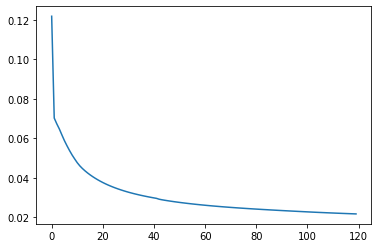

In [19]:
plt.plot(range(len(losslist)),losslist)

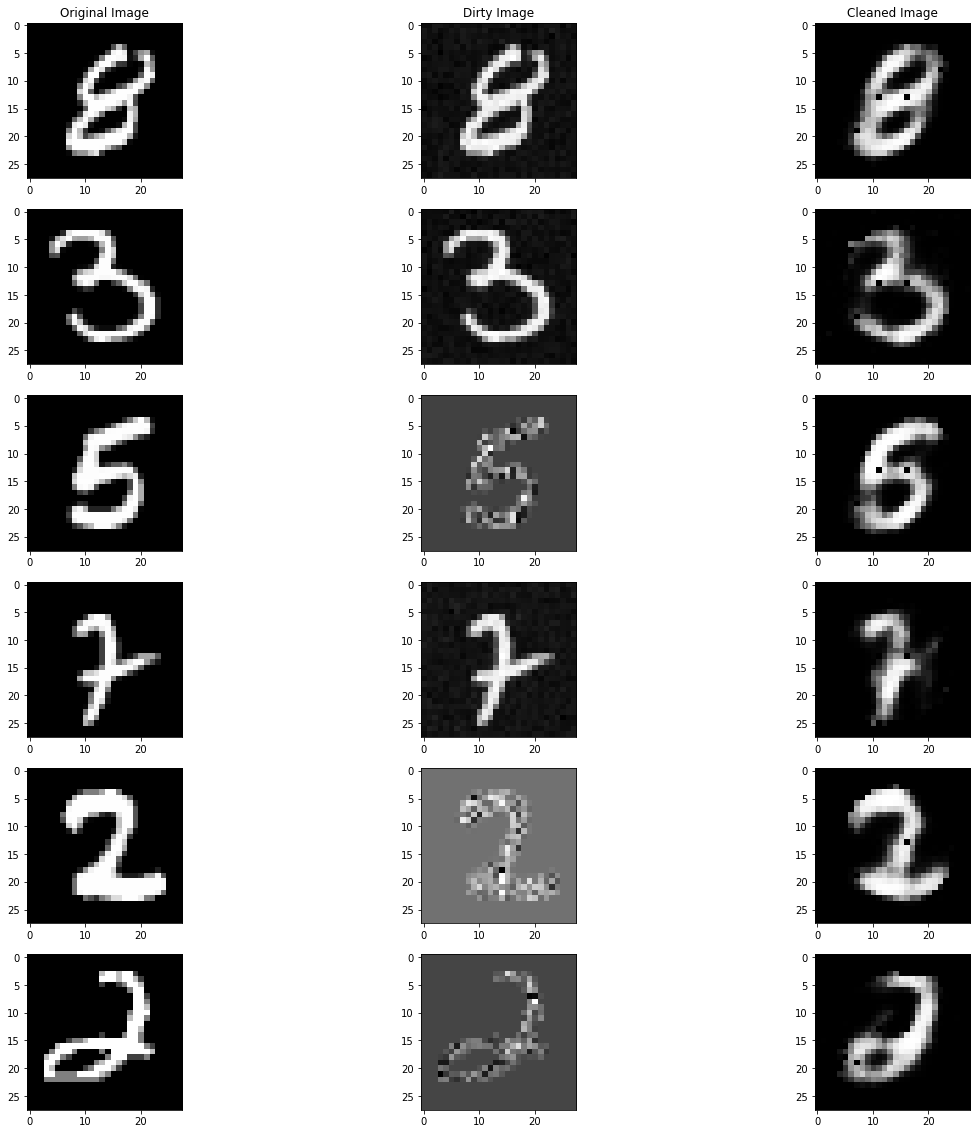

In [20]:
f,axes= plt.subplots(6,3,figsize=(20,20))
axes[0,0].set_title("Original Image")
axes[0,1].set_title("Dirty Image")
axes[0,2].set_title("Cleaned Image")

test_imgs=np.random.randint(0,10000,size=6)
for idx in range((6)):
  dirty=testset[test_imgs[idx]][0]
  clean=testset[test_imgs[idx]][1]
  label=testset[test_imgs[idx]][2]
  dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor)
  dirty=dirty.to(device)
  output=model(dirty)
  
  output=output.view(1,28,28)
  output=output.permute(1,2,0).squeeze(2)
  output=output.detach().cpu().numpy()
  
  dirty=dirty.view(1,28,28)
  dirty=dirty.permute(1,2,0).squeeze(2)
  dirty=dirty.detach().cpu().numpy()
  
  clean=clean.permute(1,2,0).squeeze(2)
  clean=clean.detach().cpu().numpy()
  
  axes[idx,0].imshow(clean,cmap="gray")
  axes[idx,1].imshow(dirty,cmap="gray")
  axes[idx,2].imshow(output,cmap="gray")
